# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [185]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [186]:
# Propara base.

base = pd.read_csv('demo01_dummy.csv')
base = base.drop('Unnamed: 0', axis=1)

In [187]:
# Separa variável de interesse.

X = base.drop('mau', axis=1)
y = base['mau']

In [188]:
# Divide base em 30% para "teste" e 70% para "train"

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

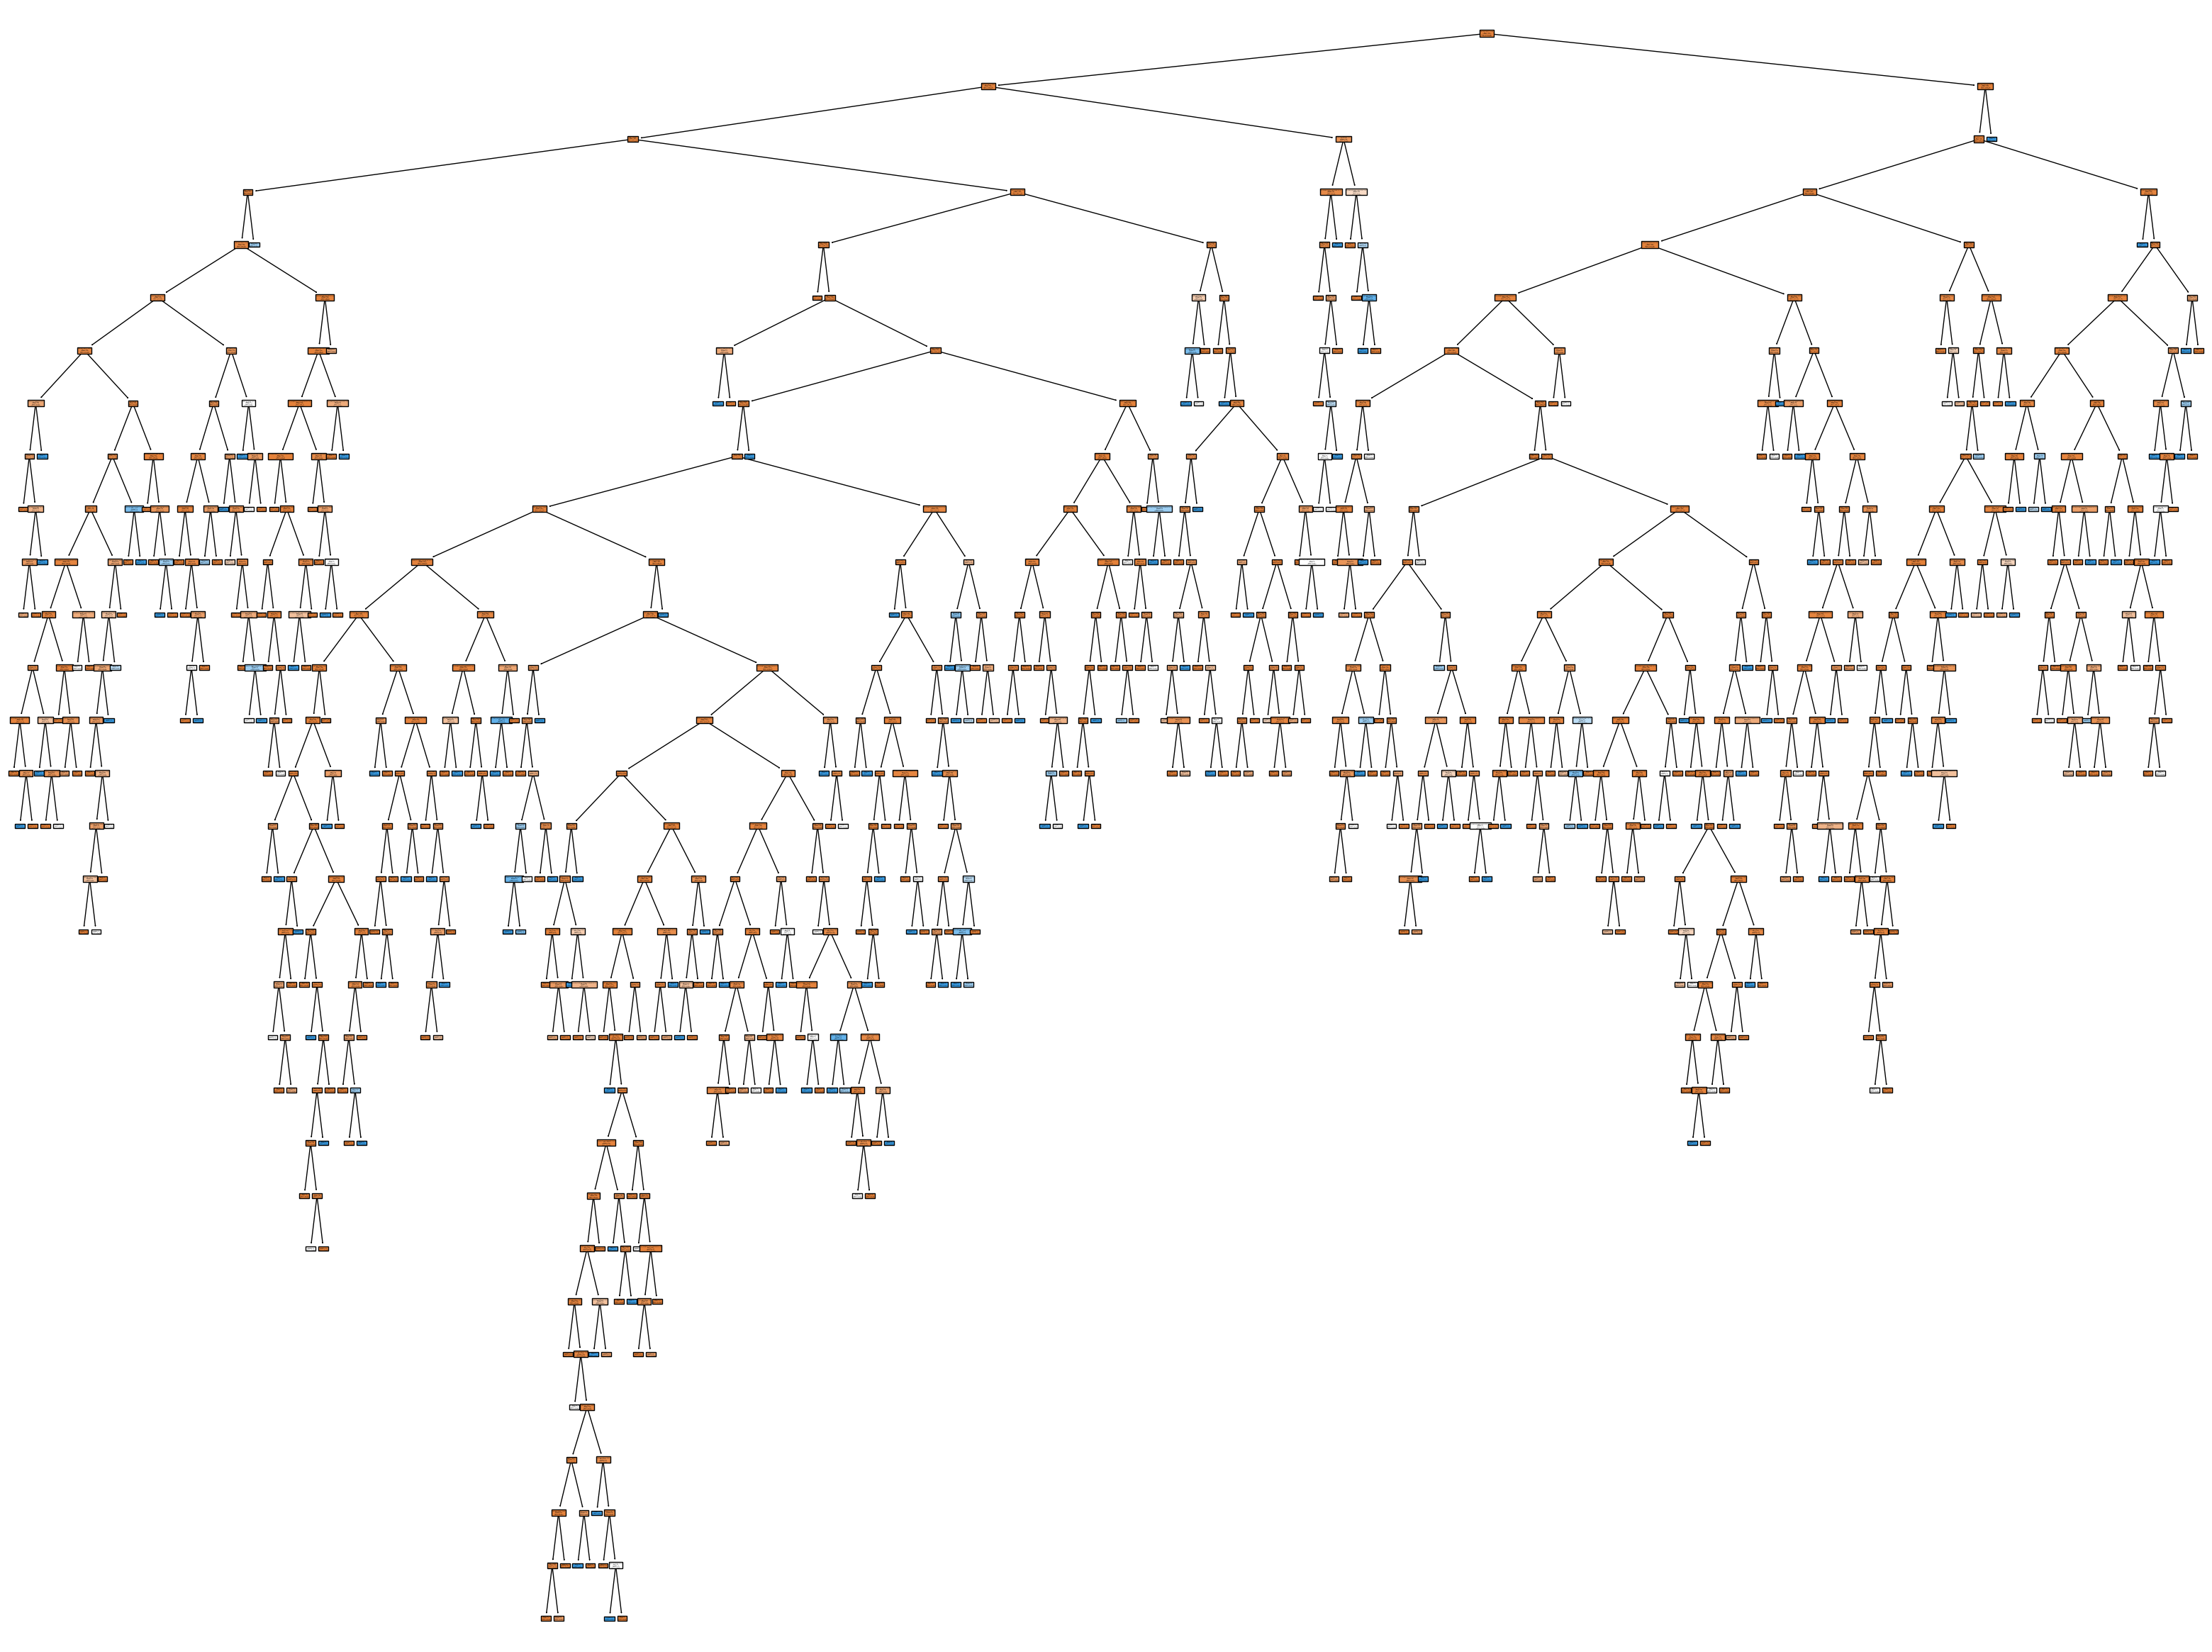

In [189]:
# 2) 1.

ad_train = DecisionTreeClassifier(random_state=100)

# 2) 2.

ad_train = ad_train.fit(X_train,y_train)

# 2) 3.

plt.figure(figsize=(40, 30))
plot_tree(ad_train,
          filled=True,
          class_names=['Aprovado', 'Reprovado'],
          feature_names=list(X.columns));

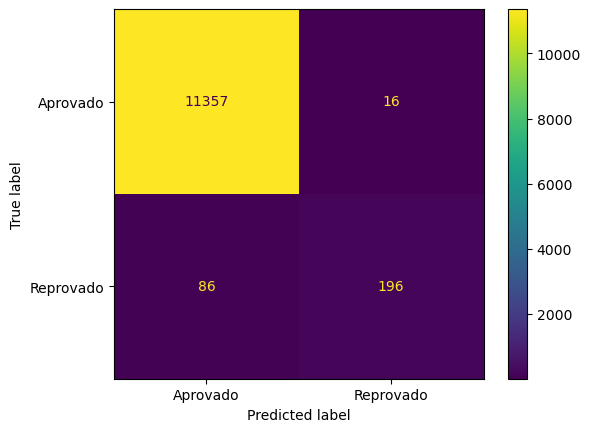

In [190]:
# 2) 4.

predictions_train = ad_train.predict(X_train)

cm = confusion_matrix(y_train, predictions_train, labels=ad_train.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Aprovado', 'Reprovado'])
disp.plot()
plt.show()

In [191]:
# 2) 5.

accuracy_score(y_train, predictions_train)

0.9912483912483913

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

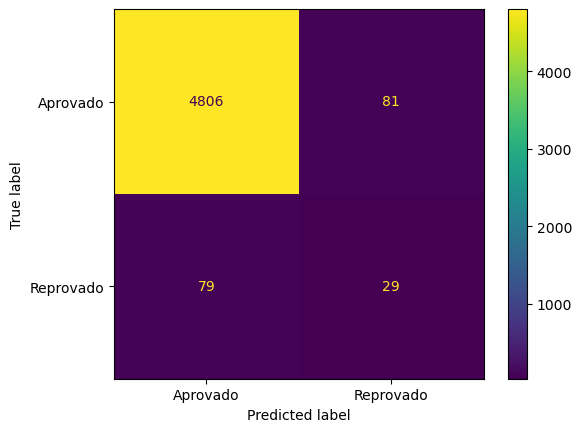

In [192]:
# 3) 1. Preve 'X_test' usando a árvore de decisão montada com os dados "train".

predictions_test = ad_train.predict(X_test)

# 3) 2. Cria e exibe matriz de confusão para "test".

cm_test = confusion_matrix(y_test, predictions_test, labels=ad_train.classes_)

ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=['Aprovado', 'Reprovado']).plot()

In [193]:
# 3) 3.

accuracy_score(y_test, predictions_test)

0.9679679679679679

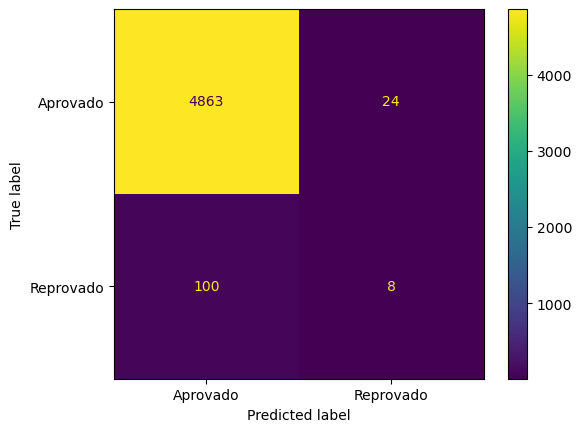

In [194]:
# 3) 4. Árvore limitada - mínimo de observações por folha = 5 / máximo de profundidade = 10 / random_state = 123 com dados "train".

ad_limitada = DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=123)
ad_limitada = ad_limitada.fit(X_train,y_train)

# 3) 4. Matriz de Classificação de dados "test" com X previsto usando árvore de decisão limitada montada com os dados "train".

predictions_limitada = ad_limitada.predict(X_test)
cm_limitada = confusion_matrix(y_test, predictions_limitada, labels=ad_limitada.classes_)

ConfusionMatrixDisplay(confusion_matrix=cm_limitada, display_labels=['Aprovado', 'Reprovado']).plot()

In [195]:
# 3) 4. Proporção de proponentes classificados como reprovados na predição da árvore limitada. 
# 3) 4. Resposta: 0,64 %.

round((sum(list(predictions_limitada)) / sum(list(~predictions_limitada))) * 100, 2)

0.64

In [196]:
# 3) 5. Testando acurácia para aprovação de todos os proponentes da análise de crédito.

for i in range(0,len(predictions_limitada)):
    list_false[i] = False
accuracy_score(y_test, list_false)


0.9783783783783784

In [197]:
# 3) 5. Resposta: A acurácia aumentou 0,32 %.

round((accuracy_score(y_test, list_false) - accuracy_score(y_test, predictions_limitada))*100,2)

0.32